In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.sample(5)
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1657,ham,S:-)if we have one good partnership going we w...
445,ham,"Sorry, my battery died, I can come by but I'm ..."
1608,ham,Are your freezing ? Are you home yet ? Will yo...
183,ham,"He will, you guys close?"
3748,spam,Dear Voucher Holder 2 claim your 1st class air...


In [10]:
#changing string target to numbers 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(5169, 2)

## 2.EDA

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

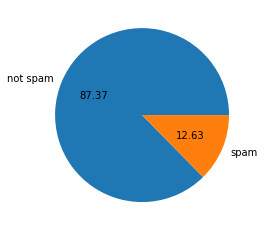

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
#nltk.download('punkt')

In [19]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)) )
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)) )
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#not spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

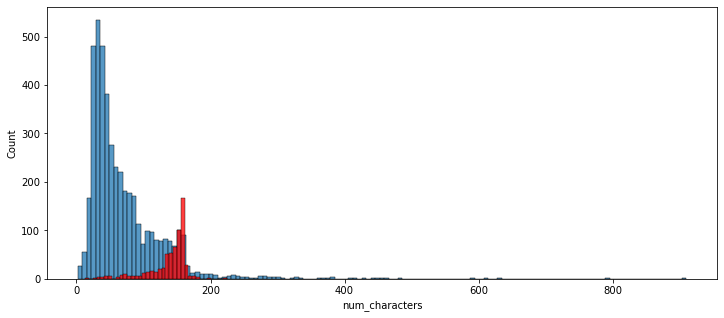

In [26]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

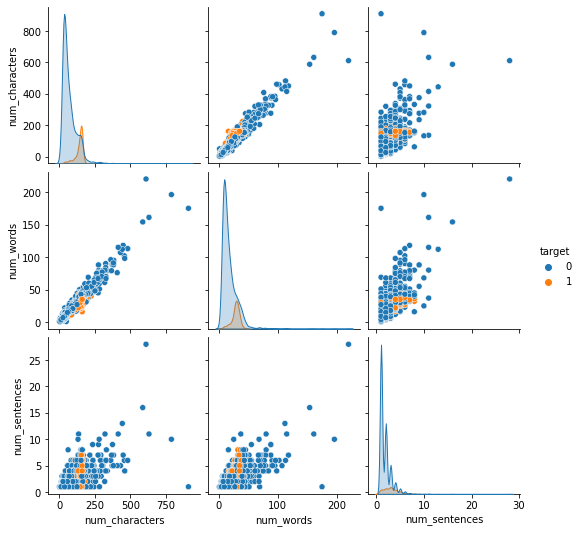

In [27]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

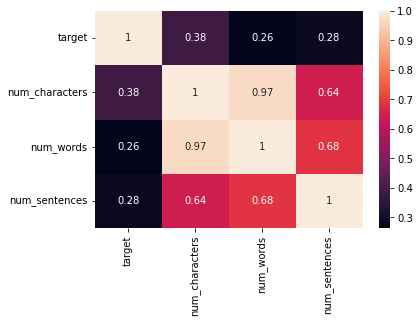

In [28]:
sns.heatmap(df.corr(),annot=True)

## 3. Text Preprocessing
    lower case
    tokenization
    remove special characters
    remove stop words and punctuation
    stemming

In [29]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
transform_text('Did you like my presentation on machine learning')

'like present machin learn'

In [31]:
df['transform_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
#pip install wordcloud

In [33]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [34]:
#!pip install --upgrade Pillow



In [35]:
#pip install --upgrade pip

In [36]:
spam_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

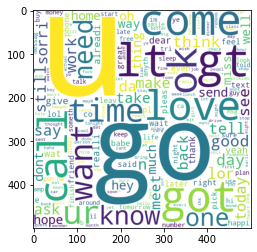

In [37]:
plt.imshow(spam_wc)

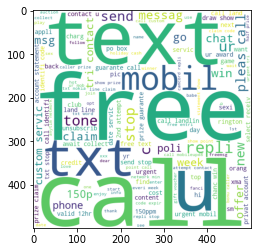

In [38]:
notspam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [39]:
df.head()


,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [41]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


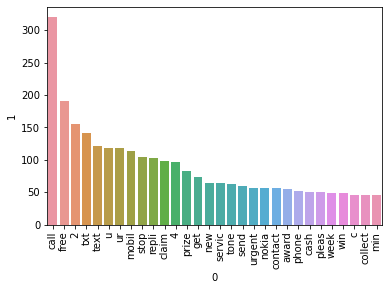

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
notspam_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)

In [44]:
len(notspam_corpus)

35394

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


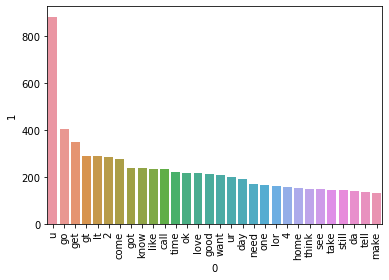

In [45]:
sns.barplot(pd.DataFrame(Counter(notspam_corpus).most_common(30))[0],pd.DataFrame(Counter(notspam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Building Model

In [70]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [71]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [72]:
# X=cv.fit_transform(df['transform_text']).toarray()
A=tfidf.fit_transform(df['transform_text']).toarray()

In [73]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# A=scaler.fit_transform(A)

In [74]:
#appending num character col to A
#A=np.hstack((A,df['num_characters'].values.reshape(-1,1)))

In [75]:
#X.shape
A.shape

(5169, 3000)

In [76]:
#X

In [77]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
X_train,X_test,y_train,y_test=train_test_split(A,y,test_size=0.2,random_state=1)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

## Gaussian

In [82]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
[[777 122]
 [ 24 111]]
0.47639484978540775


## Multinomial

In [83]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[899   0]
 [ 40  95]]
1.0


## Bernoulli

In [84]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [85]:
#pip install xgboost

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
#mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbc,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [67]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9557522123893806)

In [200]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy 0.8694390715667312
Precision 0.0

For KN
Accuracy 0.9158607350096711
Precision 0.7222222222222222

For NB
Accuracy 0.9332688588007737
Precision 0.9852941176470589

For DT
Accuracy 0.9294003868471954
Precision 0.8369565217391305

For LR
Accuracy 0.9439071566731141
Precision 0.8811881188118812

For RF
Accuracy 0.9632495164410058
Precision 0.9801980198019802

For AdaBoost
Accuracy 0.9458413926499033
Precision 0.8495575221238938

For BgC
Accuracy 0.9535783365570599
Precision 0.859504132231405

For ETC
Accuracy 0.9748549323017408
Precision 0.9823008849557522

For GBDT
Accuracy 0.9332688588007737
Precision 0.8837209302325582

For xgb
Accuracy 0.9526112185686654
Precision 0.8909090909090909



In [133]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.952611,1.000000
5,RF,0.963250,1.000000
8,ETC,0.972921,0.990826
0,SVC,0.966151,0.954545
6,AdaBoost,0.955513,0.923810
10,xgb,0.959381,0.911504
4,LR,0.940039,0.884211
9,GBDT,0.934236,0.876404
7,BgC,0.951644,0.863248


In [201]:
#Adding num characters
num_char=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_numChar':accuracy_scores,'Precision_numChar':precision_scores})
num_char

,Algorithm,Accuracy_numChar,Precision_numChar
0,SVC,0.869439,0.000000
1,KN,0.915861,0.722222
2,NB,0.933269,0.985294
3,DT,0.929400,0.836957
4,LR,0.943907,0.881188
5,RF,0.963250,0.980198
6,AdaBoost,0.945841,0.849558
7,BgC,0.953578,0.859504
8,ETC,0.974855,0.982301
9,GBDT,0.933269,0.883721


In [153]:
#3000 features
temp=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_ft_3000':accuracy_scores,'Precision_ft_3000':precision_scores})
temp

,Algorithm,Accuracy_ft_3000,Precision_ft_3000
0,SVC,0.969052,0.955752
1,KN,0.908124,1.000000
2,NB,0.961315,1.000000
3,DT,0.911992,0.750000
4,LR,0.941006,0.885417
5,RF,0.966151,1.000000
6,AdaBoost,0.961315,0.943925
7,BgC,0.944874,0.842105
8,ETC,0.971954,0.981818
9,GBDT,0.934236,0.831683


In [173]:
#after using MinMaxScaler
# scaling=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_ft_scaling':accuracy_scores,'Precision_ft_scaling':precision_scores})
# scaling

,Algorithm,Accuracy_ft_scaling,Precision_ft_scaling
0,SVC,0.961315,0.927928
1,KN,0.907157,1.000000
2,NB,0.980658,0.967480
3,DT,0.911992,0.744444
4,LR,0.952611,0.921569
5,RF,0.966151,1.000000
6,AdaBoost,0.961315,0.943925
7,BgC,0.944874,0.842105
8,ETC,0.971954,0.981818
9,GBDT,0.934236,0.831683


In [101]:
performance_df=pd.melt(performance,id_vars="Algorithm")
performance_df

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.961315
2,RF,Accuracy,0.966151
3,ETC,Accuracy,0.971954
4,SVC,Accuracy,0.969052
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.953578
7,LR,Accuracy,0.941006
8,BgC,Accuracy,0.944874
9,GBDT,Accuracy,0.934236


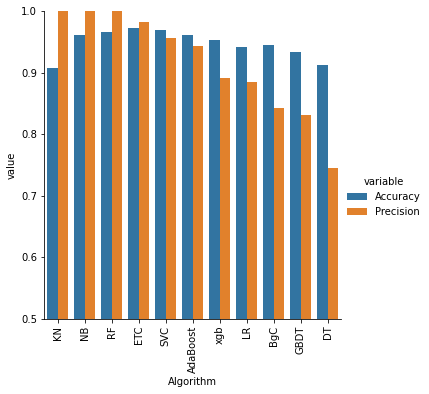

In [102]:
sns.catplot(x='Algorithm',y='value',
           hue='variable',data=performance_df,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Improving model
    changing max_features of tfidf

In [177]:
features3000df=performance.merge(temp_df,on='Algorithm')

In [203]:
scaling_df=features3000df.merge(scaling,on='Algorithm')
scaling_df

,Algorithm,Accuracy,Precision,Accuracy_ft_3000,Precision_ft_3000,Accuracy_ft_scaling,Precision_ft_scaling
0,KN,0.900387,1.000000,0.908124,1.000000,0.907157,1.000000
1,NB,0.952611,1.000000,0.961315,1.000000,0.980658,0.967480
2,RF,0.963250,1.000000,0.966151,1.000000,0.966151,1.000000
3,ETC,0.972921,0.990826,0.971954,0.981818,0.971954,0.981818
4,SVC,0.966151,0.954545,0.969052,0.955752,0.961315,0.927928
5,AdaBoost,0.955513,0.923810,0.961315,0.943925,0.961315,0.943925
6,xgb,0.959381,0.911504,0.953578,0.891892,0.953578,0.891892
7,LR,0.940039,0.884211,0.941006,0.885417,0.952611,0.921569
8,GBDT,0.934236,0.876404,0.934236,0.831683,0.934236,0.831683
9,BgC,0.951644,0.863248,0.944874,0.842105,0.944874,0.842105


In [205]:
num_char_df=scaling_df.merge(num_char,on='Algorithm')
num_char_df

,Algorithm,Accuracy,Precision,Accuracy_ft_3000,Precision_ft_3000,Accuracy_ft_scaling,Precision_ft_scaling,Accuracy_numChar,Precision_numChar
0,KN,0.900387,1.000000,0.908124,1.000000,0.907157,1.000000,0.915861,0.722222
1,NB,0.952611,1.000000,0.961315,1.000000,0.980658,0.967480,0.933269,0.985294
2,RF,0.963250,1.000000,0.966151,1.000000,0.966151,1.000000,0.963250,0.980198
3,ETC,0.972921,0.990826,0.971954,0.981818,0.971954,0.981818,0.974855,0.982301
4,SVC,0.966151,0.954545,0.969052,0.955752,0.961315,0.927928,0.869439,0.000000
5,AdaBoost,0.955513,0.923810,0.961315,0.943925,0.961315,0.943925,0.945841,0.849558
6,xgb,0.959381,0.911504,0.953578,0.891892,0.953578,0.891892,0.952611,0.890909
7,LR,0.940039,0.884211,0.941006,0.885417,0.952611,0.921569,0.943907,0.881188
8,GBDT,0.934236,0.876404,0.934236,0.831683,0.934236,0.831683,0.933269,0.883721
9,BgC,0.951644,0.863248,0.944874,0.842105,0.944874,0.842105,0.953578,0.859504


In [88]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))